In [1]:
from finrl import config
%load_ext autoreload
%autoreload 2
from finrl import config_tickers
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.finrl_meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.finrl_meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.finrl_meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.finrl_meta.env_cryptocurrency_trading.env_multiple_crypto import CryptoEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.finrl_meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline , trx_plot
from pprint import pprint
import yfinance as yf
import sys
sys.path.append("../FinRL-Library")

import itertools
%matplotlib inline

/Users/henriquerio/miniconda3/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
cryptocurrencies = ['BNB-USD','BTC-USD', 'ETH-USD', 'XRP-USD', 'LEO-USD', 'ETC-USD', 'FTT-USD', 'TRX-USD', 'BCH-USD', 'LINK-USD', 'ATOM-USD', 'LTC-USD', 'DAI-USD', 'CRO-USD', 'WBTC-USD', 'DOGE-USD', 'BUSD-USD', 'ADA-USD']

cryptos =['BTC-USD','ETH-USD','LTC-USD','XRP-USD']

In [4]:
df = YahooDownloader(start_date = '2018-01-01',
                     end_date = '2022-04-12',
                     ticker_list = cryptocurrencies).fetch_data()

[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (24558, 8)


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


In [5]:
df.sort_values(['date','tic'],ignore_index=True)

,date,open,high,low,close,volume,tic,day
0,2018-01-01,0.718847,0.730051,0.671941,0.728657,150186000,ADA-USD,0
1,2018-01-01,2534.820068,2534.860107,2389.520020,2432.540039,922812992,BCH-USD,0
2,2018-01-01,8.629530,8.700570,7.959220,8.414610,66422800,BNB-USD,0
3,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,10291200000,BTC-USD,0
4,2018-01-01,0.009031,0.009063,0.008101,0.008909,50616900,DOGE-USD,0
...,...,...,...,...,...,...,...,...
24553,2022-04-12,13.755032,14.300198,13.698603,13.973591,471710040,LINK-USD,1
24554,2022-04-12,102.643730,105.672188,102.251740,104.828415,638546461,LTC-USD,1
24555,2022-04-12,0.058243,0.060377,0.058096,0.059956,1043273712,TRX-USD,1
24556,2022-04-12,39587.363281,40628.132812,39440.031250,40099.515625,288831787,WBTC-USD,1


In [6]:
fe = FeatureEngineer(
    use_technical_indicator=True,
    tech_indicator_list = config.INDICATORS,
    use_vix=True,
    use_turbulence=True,
    user_defined_feature = False)

processed = fe.preprocess_data(df)

/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/preprocessors.py:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/preprocessors.py:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/preprocessors.py:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/preprocessors.py:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  

Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1077, 8)
Successfully added vix


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


Successfully added turbulence index


In [7]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [8]:
processed_full.sort_values(['date','tic'],ignore_index=True).tail(10)

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
11837,2022-04-11,BCH-USD,320.968140,320.968140,292.248291,294.762970,4.116765e+09,0.0,-3.459933,407.723605,306.542817,42.426056,-89.313637,25.738607,342.363823,325.072927,24.370001,3.23325
11838,2022-04-11,BNB-USD,418.658447,419.490784,392.109924,394.086884,2.192783e+09,0.0,4.279292,458.166690,397.985861,46.559786,-39.937402,21.299734,414.495116,401.266677,24.370001,3.23325
11839,2022-04-11,BTC-USD,42201.039062,42424.589844,39373.058594,39521.902344,3.394991e+10,0.0,-101.802195,48952.059368,40449.121101,44.312396,-87.221738,23.562781,43387.958464,41875.924219,24.370001,3.23325
11840,2022-04-11,DOGE-USD,0.149374,0.151292,0.133818,0.134654,1.515679e+09,0.0,0.004152,0.160653,0.124826,48.683257,29.919645,37.849425,0.134350,0.132706,24.370001,3.23325
11841,2022-04-11,ETC-USD,40.460621,40.480476,36.060905,37.008202,8.710933e+08,0.0,1.022937,52.556162,37.782011,49.570902,-26.905208,20.446883,40.657542,34.673574,24.370001,3.23325
11842,2022-04-11,ETH-USD,3209.576904,3214.461914,2962.756592,2981.052246,2.189180e+10,0.0,63.283908,3590.798941,2958.034555,48.164889,-17.066203,14.600373,3114.273413,2934.768583,24.370001,3.23325
11843,2022-04-11,LINK-USD,15.340743,15.340743,13.627220,13.752770,5.813155e+08,0.0,-0.054010,18.371504,14.205512,43.299277,-91.176147,18.345658,15.658634,15.115785,24.370001,3.23325
11844,2022-04-11,LTC-USD,111.153145,111.153145,102.597687,102.607391,8.071939e+08,0.0,-1.814816,137.456974,105.667812,42.200410,-114.058541,28.432515,118.336642,114.818916,24.370001,3.23325
11845,2022-04-11,TRX-USD,0.062516,0.062552,0.057985,0.058227,1.069384e+09,0.0,-0.000462,0.076928,0.058236,42.102274,-95.903906,22.834566,0.065458,0.063485,24.370001,3.23325
11846,2022-04-11,XRP-USD,0.756422,0.756422,0.685738,0.695023,2.367700e+09,0.0,-0.014994,0.902803,0.722384,42.877705,-201.561925,31.527952,0.808024,0.786052,24.370001,3.23325


In [9]:
train = data_split(processed_full, '2016-01-01','2020-06-01')
trade = data_split(processed_full, '2020-06-01','2022-04-08')
print(len(train))
print(len(trade))

6666
5159


In [10]:
train.tic.unique()

array(['ADA-USD', 'BCH-USD', 'BNB-USD', 'BTC-USD', 'DOGE-USD', 'ETC-USD',
       'ETH-USD', 'LINK-USD', 'LTC-USD', 'TRX-USD', 'XRP-USD'],
      dtype=object)

In [11]:
trade.head(20)

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2020-06-01,ADA-USD,0.074244,0.082385,0.073659,0.081168,6.817807e+08,0.0,0.006800,0.076681,0.039623,72.293434,290.136257,66.784834,0.055404,0.046894,28.23,65.824062
0,2020-06-01,BCH-USD,239.847229,256.042175,239.109161,255.352188,3.467572e+09,0.0,0.729876,253.891699,222.683137,52.410839,81.769518,18.068951,241.176086,240.570595,28.23,65.824062
0,2020-06-01,BNB-USD,17.069530,18.001842,17.012215,17.914942,3.434450e+08,0.0,0.311277,17.762673,15.500985,55.829790,144.070654,19.701016,16.592179,16.051742,28.23,65.824062
0,2020-06-01,BTC-USD,9463.605469,10199.565430,9450.899414,10167.268555,3.519890e+10,0.0,251.501799,10088.223137,8695.663777,60.451570,134.055150,33.859705,9315.720312,8344.314860,28.23,65.824062
0,2020-06-01,DOGE-USD,0.002555,0.002662,0.002553,0.002647,1.957483e+08,0.0,0.000048,0.002619,0.002448,58.587955,168.627512,27.246233,0.002530,0.002314,28.23,65.824062
0,2020-06-01,ETC-USD,6.927633,7.230925,6.886342,7.211397,1.604432e+09,0.0,0.203335,7.377083,6.016652,55.459795,78.588110,9.890190,6.740953,6.208195,28.23,65.824062
0,2020-06-01,ETH-USD,230.860260,248.236282,230.488052,246.991760,1.395173e+10,0.0,9.783524,240.033325,183.837217,61.865336,256.999960,40.221574,208.978293,192.993988,28.23,65.824062
0,2020-06-01,LINK-USD,4.132302,4.471899,4.124890,4.380642,4.913553e+08,0.0,0.128728,4.270979,3.591227,60.158036,240.411462,40.089493,3.869716,3.616149,28.23,65.824062
0,2020-06-01,LTC-USD,45.574230,48.395439,45.425323,48.125233,3.035653e+09,0.0,0.458720,47.346920,41.139405,53.857856,103.271587,22.675500,44.733334,44.192972,28.23,65.824062
0,2020-06-01,TRX-USD,0.015870,0.017026,0.015816,0.017007,1.709386e+09,0.0,0.000321,0.016432,0.013868,57.879137,151.728874,29.438636,0.015283,0.014406,28.23,65.824062


In [12]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(config.INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 11, State Space: 111


In [13]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": config.INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

#e_train_gymc = CryptoEnv(df = train, **env_kwargs)

In [14]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [15]:
agent = DRLAgent(env = env_train)

In [171]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device


In [172]:
trained_a2c = agent.train_model(model=model_a2c,
                                tb_log_name='a2c',
                                total_timesteps=500000)

--------------------------------------
| time/                 |            |
|    fps                | 908        |
|    iterations         | 100        |
|    time_elapsed       | 0          |
|    total_timesteps    | 500        |
| train/                |            |
|    entropy_loss       | -15.6      |
|    explained_variance | 0.233      |
|    learning_rate      | 0.0007     |
|    n_updates          | 99         |
|    policy_loss        | 31.5       |
|    reward             | 0.37108698 |
|    std                | 0.998      |
|    value_loss         | 5.79       |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1035       |
|    iterations         | 200        |
|    time_elapsed       | 0          |
|    total_timesteps    | 1000       |
| train/                |            |
|    entropy_loss       | -15.6      |
|    explained_variance | -0.0894    |
|    learning_rate      |

-------------------------------------
| time/                 |           |
|    fps                | 1186      |
|    iterations         | 1400      |
|    time_elapsed       | 5         |
|    total_timesteps    | 7000      |
| train/                |           |
|    entropy_loss       | -15.6     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1399      |
|    policy_loss        | -29.8     |
|    reward             | 0.9633033 |
|    std                | 1         |
|    value_loss         | 4.36      |
-------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1189       |
|    iterations         | 1500       |
|    time_elapsed       | 6          |
|    total_timesteps    | 7500       |
| train/                |            |
|    entropy_loss       | -15.7      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
| 

--------------------------------------
| time/                 |            |
|    fps                | 1193       |
|    iterations         | 2700       |
|    time_elapsed       | 11         |
|    total_timesteps    | 13500      |
| train/                |            |
|    entropy_loss       | -15.7      |
|    explained_variance | 0.0286     |
|    learning_rate      | 0.0007     |
|    n_updates          | 2699       |
|    policy_loss        | -16.5      |
|    reward             | 0.29525328 |
|    std                | 1.01       |
|    value_loss         | 5.09       |
--------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1195      |
|    iterations         | 2800      |
|    time_elapsed       | 11        |
|    total_timesteps    | 14000     |
| train/                |           |
|    entropy_loss       | -15.8     |
|    explained_variance | -1.38e-05 |
|    learning_rate      | 0.0007  

--------------------------------------
| time/                 |            |
|    fps                | 1185       |
|    iterations         | 4100       |
|    time_elapsed       | 17         |
|    total_timesteps    | 20500      |
| train/                |            |
|    entropy_loss       | -15.8      |
|    explained_variance | -0.571     |
|    learning_rate      | 0.0007     |
|    n_updates          | 4099       |
|    policy_loss        | 15.9       |
|    reward             | -1.0796537 |
|    std                | 1.02       |
|    value_loss         | 13.7       |
--------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1186     |
|    iterations         | 4200     |
|    time_elapsed       | 17       |
|    total_timesteps    | 21000    |
| train/                |          |
|    entropy_loss       | -15.8    |
|    explained_variance | 0.165    |
|    learning_rate      | 0.0007   |
|    n

---------------------------------------
| time/                 |             |
|    fps                | 1193        |
|    iterations         | 5400        |
|    time_elapsed       | 22          |
|    total_timesteps    | 27000       |
| train/                |             |
|    entropy_loss       | -15.9       |
|    explained_variance | 0           |
|    learning_rate      | 0.0007      |
|    n_updates          | 5399        |
|    policy_loss        | -32         |
|    reward             | -0.26987696 |
|    std                | 1.03        |
|    value_loss         | 4.9         |
---------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1185       |
|    iterations         | 5500       |
|    time_elapsed       | 23         |
|    total_timesteps    | 27500      |
| train/                |            |
|    entropy_loss       | -15.9      |
|    explained_variance | -0.147     |
|    lear

------------------------------------
| time/                 |          |
|    fps                | 1190     |
|    iterations         | 6700     |
|    time_elapsed       | 28       |
|    total_timesteps    | 33500    |
| train/                |          |
|    entropy_loss       | -15.9    |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6699     |
|    policy_loss        | 79       |
|    reward             | -6.75328 |
|    std                | 1.03     |
|    value_loss         | 32.1     |
------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 1191        |
|    iterations         | 6800        |
|    time_elapsed       | 28          |
|    total_timesteps    | 34000       |
| train/                |             |
|    entropy_loss       | -15.9       |
|    explained_variance | -1.19e-07   |
|    learning_rate      | 0.0007      |
|    n_u

--------------------------------------
| time/                 |            |
|    fps                | 1195       |
|    iterations         | 8000       |
|    time_elapsed       | 33         |
|    total_timesteps    | 40000      |
| train/                |            |
|    entropy_loss       | -16        |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 7999       |
|    policy_loss        | 46.2       |
|    reward             | -24.681664 |
|    std                | 1.04       |
|    value_loss         | 14.1       |
--------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1195      |
|    iterations         | 8100      |
|    time_elapsed       | 33        |
|    total_timesteps    | 40500     |
| train/                |           |
|    entropy_loss       | -16       |
|    explained_variance | 0         |
|    learning_rate      | 0.0007  

-------------------------------------
| time/                 |           |
|    fps                | 1202      |
|    iterations         | 9400      |
|    time_elapsed       | 39        |
|    total_timesteps    | 47000     |
| train/                |           |
|    entropy_loss       | -16       |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9399      |
|    policy_loss        | 17.9      |
|    reward             | 1.5573106 |
|    std                | 1.04      |
|    value_loss         | 2.09      |
-------------------------------------
day: 605, episode: 2560
begin_total_asset: 1000000.00
end_total_asset: 987795.62
total_reward: -12204.38
total_cost: 1000.27
total_trades: 3996
Sharpe: 0.427
--------------------------------------
| time/                 |            |
|    fps                | 1202       |
|    iterations         | 9500       |
|    time_elapsed       | 39         |
|    total_timesteps    | 47500      |


day: 605, episode: 2570
begin_total_asset: 1000000.00
end_total_asset: 989491.43
total_reward: -10508.57
total_cost: 1012.65
total_trades: 4007
Sharpe: 0.428
---------------------------------------
| time/                 |             |
|    fps                | 1206        |
|    iterations         | 10700       |
|    time_elapsed       | 44          |
|    total_timesteps    | 53500       |
| train/                |             |
|    entropy_loss       | -16.1       |
|    explained_variance | 1.19e-07    |
|    learning_rate      | 0.0007      |
|    n_updates          | 10699       |
|    policy_loss        | 16.5        |
|    reward             | -0.81013006 |
|    std                | 1.05        |
|    value_loss         | 6.54        |
---------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1206      |
|    iterations         | 10800     |
|    time_elapsed       | 44        |
|    total_t

-------------------------------------
| time/                 |           |
|    fps                | 1208      |
|    iterations         | 12000     |
|    time_elapsed       | 49        |
|    total_timesteps    | 60000     |
| train/                |           |
|    entropy_loss       | -16.1     |
|    explained_variance | 0.0864    |
|    learning_rate      | 0.0007    |
|    n_updates          | 11999     |
|    policy_loss        | 266       |
|    reward             | 8.8579235 |
|    std                | 1.04      |
|    value_loss         | 1.25e+03  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1209      |
|    iterations         | 12100     |
|    time_elapsed       | 50        |
|    total_timesteps    | 60500     |
| train/                |           |
|    entropy_loss       | -16.1     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updat

-------------------------------------
| time/                 |           |
|    fps                | 1211      |
|    iterations         | 13400     |
|    time_elapsed       | 55        |
|    total_timesteps    | 67000     |
| train/                |           |
|    entropy_loss       | -15.9     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13399     |
|    policy_loss        | 66.4      |
|    reward             | 2.089317  |
|    std                | 1.03      |
|    value_loss         | 20.6      |
-------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1212       |
|    iterations         | 13500      |
|    time_elapsed       | 55         |
|    total_timesteps    | 67500      |
| train/                |            |
|    entropy_loss       | -15.9      |
|    explained_variance | 1.19e-07   |
|    learning_rate      | 0.0007     |
| 

---------------------------------------
| time/                 |             |
|    fps                | 1211        |
|    iterations         | 14700       |
|    time_elapsed       | 60          |
|    total_timesteps    | 73500       |
| train/                |             |
|    entropy_loss       | -16.1       |
|    explained_variance | 1.79e-07    |
|    learning_rate      | 0.0007      |
|    n_updates          | 14699       |
|    policy_loss        | 67.5        |
|    reward             | -0.33379155 |
|    std                | 1.05        |
|    value_loss         | 19.2        |
---------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1211      |
|    iterations         | 14800     |
|    time_elapsed       | 61        |
|    total_timesteps    | 74000     |
| train/                |           |
|    entropy_loss       | -16.1     |
|    explained_variance | 0         |
|    learning_rate

-------------------------------------
| time/                 |           |
|    fps                | 1214      |
|    iterations         | 16000     |
|    time_elapsed       | 65        |
|    total_timesteps    | 80000     |
| train/                |           |
|    entropy_loss       | -16.3     |
|    explained_variance | 0.156     |
|    learning_rate      | 0.0007    |
|    n_updates          | 15999     |
|    policy_loss        | 399       |
|    reward             | 7.5062795 |
|    std                | 1.07      |
|    value_loss         | 1.98e+03  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1214      |
|    iterations         | 16100     |
|    time_elapsed       | 66        |
|    total_timesteps    | 80500     |
| train/                |           |
|    entropy_loss       | -16.3     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updat

-------------------------------------
| time/                 |           |
|    fps                | 1216      |
|    iterations         | 17300     |
|    time_elapsed       | 71        |
|    total_timesteps    | 86500     |
| train/                |           |
|    entropy_loss       | -16.4     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17299     |
|    policy_loss        | -5.56     |
|    reward             | 0.5876991 |
|    std                | 1.08      |
|    value_loss         | 0.588     |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1216      |
|    iterations         | 17400     |
|    time_elapsed       | 71        |
|    total_timesteps    | 87000     |
| train/                |           |
|    entropy_loss       | -16.4     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updat

-------------------------------------
| time/                 |           |
|    fps                | 1210      |
|    iterations         | 18700     |
|    time_elapsed       | 77        |
|    total_timesteps    | 93500     |
| train/                |           |
|    entropy_loss       | -16.4     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18699     |
|    policy_loss        | -93.3     |
|    reward             | 2.0094066 |
|    std                | 1.09      |
|    value_loss         | 35.1      |
-------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1210       |
|    iterations         | 18800      |
|    time_elapsed       | 77         |
|    total_timesteps    | 94000      |
| train/                |            |
|    entropy_loss       | -16.5      |
|    explained_variance | -1.19e-07  |
|    learning_rate      | 0.0007     |
| 

--------------------------------------
| time/                 |            |
|    fps                | 1209       |
|    iterations         | 20000      |
|    time_elapsed       | 82         |
|    total_timesteps    | 100000     |
| train/                |            |
|    entropy_loss       | -16.5      |
|    explained_variance | 0.185      |
|    learning_rate      | 0.0007     |
|    n_updates          | 19999      |
|    policy_loss        | -9.6       |
|    reward             | -3.2977152 |
|    std                | 1.09       |
|    value_loss         | 1.06e+03   |
--------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 1209        |
|    iterations         | 20100       |
|    time_elapsed       | 83          |
|    total_timesteps    | 100500      |
| train/                |             |
|    entropy_loss       | -16.4       |
|    explained_variance | 1.79e-07    |
|    learning_ra

--------------------------------------
| time/                 |            |
|    fps                | 1211       |
|    iterations         | 21300      |
|    time_elapsed       | 87         |
|    total_timesteps    | 106500     |
| train/                |            |
|    entropy_loss       | -16.3      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 21299      |
|    policy_loss        | 50.8       |
|    reward             | -1.6544234 |
|    std                | 1.08       |
|    value_loss         | 12.4       |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1211       |
|    iterations         | 21400      |
|    time_elapsed       | 88         |
|    total_timesteps    | 107000     |
| train/                |            |
|    entropy_loss       | -16.3      |
|    explained_variance | 0          |
|    learning_rate      |

-------------------------------------
| time/                 |           |
|    fps                | 1211      |
|    iterations         | 22600     |
|    time_elapsed       | 93        |
|    total_timesteps    | 113000    |
| train/                |           |
|    entropy_loss       | -16.3     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 22599     |
|    policy_loss        | 25        |
|    reward             | 0.5863767 |
|    std                | 1.08      |
|    value_loss         | 3.52      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1211      |
|    iterations         | 22700     |
|    time_elapsed       | 93        |
|    total_timesteps    | 113500    |
| train/                |           |
|    entropy_loss       | -16.4     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updat

--------------------------------------
| time/                 |            |
|    fps                | 1211       |
|    iterations         | 23900      |
|    time_elapsed       | 98         |
|    total_timesteps    | 119500     |
| train/                |            |
|    entropy_loss       | -16.4      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 23899      |
|    policy_loss        | -67        |
|    reward             | -0.6341081 |
|    std                | 1.09       |
|    value_loss         | 65         |
--------------------------------------
day: 605, episode: 2680
begin_total_asset: 1000000.00
end_total_asset: 986652.66
total_reward: -13347.34
total_cost: 999.08
total_trades: 4480
Sharpe: 0.427
-------------------------------------
| time/                 |           |
|    fps                | 1211      |
|    iterations         | 24000     |
|    time_elapsed       | 99        |
|    total_timesteps    | 120

-------------------------------------
| time/                 |           |
|    fps                | 1213      |
|    iterations         | 25200     |
|    time_elapsed       | 103       |
|    total_timesteps    | 126000    |
| train/                |           |
|    entropy_loss       | -16.5     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 25199     |
|    policy_loss        | -307      |
|    reward             | 2.2622037 |
|    std                | 1.1       |
|    value_loss         | 538       |
-------------------------------------
day: 605, episode: 2690
begin_total_asset: 1000000.00
end_total_asset: 986592.05
total_reward: -13407.95
total_cost: 999.07
total_trades: 4269
Sharpe: 0.427
--------------------------------------
| time/                 |            |
|    fps                | 1213       |
|    iterations         | 25300      |
|    time_elapsed       | 104        |
|    total_timesteps    | 126500     |
|

----------------------------------------
| time/                 |              |
|    fps                | 1213         |
|    iterations         | 26500        |
|    time_elapsed       | 109          |
|    total_timesteps    | 132500       |
| train/                |              |
|    entropy_loss       | -16.7        |
|    explained_variance | 0.00502      |
|    learning_rate      | 0.0007       |
|    n_updates          | 26499        |
|    policy_loss        | -9.09        |
|    reward             | -0.018582694 |
|    std                | 1.11         |
|    value_loss         | 14.2         |
----------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1213       |
|    iterations         | 26600      |
|    time_elapsed       | 109        |
|    total_timesteps    | 133000     |
| train/                |            |
|    entropy_loss       | -16.7      |
|    explained_variance | 0.0304

--------------------------------------
| time/                 |            |
|    fps                | 1214       |
|    iterations         | 27800      |
|    time_elapsed       | 114        |
|    total_timesteps    | 139000     |
| train/                |            |
|    entropy_loss       | -16.8      |
|    explained_variance | -0.0834    |
|    learning_rate      | 0.0007     |
|    n_updates          | 27799      |
|    policy_loss        | -111       |
|    reward             | -1.9618126 |
|    std                | 1.13       |
|    value_loss         | 48.4       |
--------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1214      |
|    iterations         | 27900     |
|    time_elapsed       | 114       |
|    total_timesteps    | 139500    |
| train/                |           |
|    entropy_loss       | -16.8     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007  

--------------------------------------
| time/                 |            |
|    fps                | 1215       |
|    iterations         | 29100      |
|    time_elapsed       | 119        |
|    total_timesteps    | 145500     |
| train/                |            |
|    entropy_loss       | -17.1      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 29099      |
|    policy_loss        | 18.1       |
|    reward             | -10.262498 |
|    std                | 1.16       |
|    value_loss         | 9.49       |
--------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 1215        |
|    iterations         | 29200       |
|    time_elapsed       | 120         |
|    total_timesteps    | 146000      |
| train/                |             |
|    entropy_loss       | -17.2       |
|    explained_variance | 0           |
|    learning_ra

-------------------------------------
| time/                 |           |
|    fps                | 1216      |
|    iterations         | 30400     |
|    time_elapsed       | 124       |
|    total_timesteps    | 152000    |
| train/                |           |
|    entropy_loss       | -17.3     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 30399     |
|    policy_loss        | -8.86     |
|    reward             | 1.0437973 |
|    std                | 1.18      |
|    value_loss         | 0.99      |
-------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1216       |
|    iterations         | 30500      |
|    time_elapsed       | 125        |
|    total_timesteps    | 152500     |
| train/                |            |
|    entropy_loss       | -17.3      |
|    explained_variance | 1.19e-07   |
|    learning_rate      | 0.0007     |
| 

---------------------------------------
| time/                 |             |
|    fps                | 1217        |
|    iterations         | 31700       |
|    time_elapsed       | 130         |
|    total_timesteps    | 158500      |
| train/                |             |
|    entropy_loss       | -17.5       |
|    explained_variance | 0           |
|    learning_rate      | 0.0007      |
|    n_updates          | 31699       |
|    policy_loss        | -22.2       |
|    reward             | -0.08210148 |
|    std                | 1.2         |
|    value_loss         | 1.97        |
---------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 1217        |
|    iterations         | 31800       |
|    time_elapsed       | 130         |
|    total_timesteps    | 159000      |
| train/                |             |
|    entropy_loss       | -17.5       |
|    explained_variance | 0           |


--------------------------------------
| time/                 |            |
|    fps                | 1218       |
|    iterations         | 33000      |
|    time_elapsed       | 135        |
|    total_timesteps    | 165000     |
| train/                |            |
|    entropy_loss       | -17.7      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 32999      |
|    policy_loss        | -3.62      |
|    reward             | 0.15247208 |
|    std                | 1.22       |
|    value_loss         | 2.47       |
--------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1218      |
|    iterations         | 33100     |
|    time_elapsed       | 135       |
|    total_timesteps    | 165500    |
| train/                |           |
|    entropy_loss       | -17.7     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007  

--------------------------------------
| time/                 |            |
|    fps                | 1219       |
|    iterations         | 34300      |
|    time_elapsed       | 140        |
|    total_timesteps    | 171500     |
| train/                |            |
|    entropy_loss       | -17.9      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 34299      |
|    policy_loss        | -0.0659    |
|    reward             | -3.5587952 |
|    std                | 1.24       |
|    value_loss         | 0.0962     |
--------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 1219        |
|    iterations         | 34400       |
|    time_elapsed       | 141         |
|    total_timesteps    | 172000      |
| train/                |             |
|    entropy_loss       | -18         |
|    explained_variance | 5.96e-08    |
|    learning_ra

---------------------------------------
| time/                 |             |
|    fps                | 1220        |
|    iterations         | 35600       |
|    time_elapsed       | 145         |
|    total_timesteps    | 178000      |
| train/                |             |
|    entropy_loss       | -18.1       |
|    explained_variance | 0           |
|    learning_rate      | 0.0007      |
|    n_updates          | 35599       |
|    policy_loss        | -32.9       |
|    reward             | 0.034704946 |
|    std                | 1.27        |
|    value_loss         | 6.28        |
---------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 1220        |
|    iterations         | 35700       |
|    time_elapsed       | 146         |
|    total_timesteps    | 178500      |
| train/                |             |
|    entropy_loss       | -18.1       |
|    explained_variance | 0           |


----------------------------------------
| time/                 |              |
|    fps                | 1221         |
|    iterations         | 36900        |
|    time_elapsed       | 151          |
|    total_timesteps    | 184500       |
| train/                |              |
|    entropy_loss       | -18.5        |
|    explained_variance | 0            |
|    learning_rate      | 0.0007       |
|    n_updates          | 36899        |
|    policy_loss        | -1.83        |
|    reward             | -0.002298379 |
|    std                | 1.31         |
|    value_loss         | 0.139        |
----------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1221       |
|    iterations         | 37000      |
|    time_elapsed       | 151        |
|    total_timesteps    | 185000     |
| train/                |            |
|    entropy_loss       | -18.5      |
|    explained_variance | 0     

-------------------------------------
| time/                 |           |
|    fps                | 1221      |
|    iterations         | 38200     |
|    time_elapsed       | 156       |
|    total_timesteps    | 191000    |
| train/                |           |
|    entropy_loss       | -18.6     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 38199     |
|    policy_loss        | 100       |
|    reward             | -9.269791 |
|    std                | 1.33      |
|    value_loss         | 25.3      |
-------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1221       |
|    iterations         | 38300      |
|    time_elapsed       | 156        |
|    total_timesteps    | 191500     |
| train/                |            |
|    entropy_loss       | -18.6      |
|    explained_variance | -1.59      |
|    learning_rate      | 0.0007     |
| 

---------------------------------------
| time/                 |             |
|    fps                | 1220        |
|    iterations         | 39500       |
|    time_elapsed       | 161         |
|    total_timesteps    | 197500      |
| train/                |             |
|    entropy_loss       | -18.9       |
|    explained_variance | -1.19e-07   |
|    learning_rate      | 0.0007      |
|    n_updates          | 39499       |
|    policy_loss        | -1.51       |
|    reward             | -0.28686142 |
|    std                | 1.36        |
|    value_loss         | 0.252       |
---------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 1220        |
|    iterations         | 39600       |
|    time_elapsed       | 162         |
|    total_timesteps    | 198000      |
| train/                |             |
|    entropy_loss       | -18.9       |
|    explained_variance | 0           |


--------------------------------------
| time/                 |            |
|    fps                | 1219       |
|    iterations         | 40800      |
|    time_elapsed       | 167        |
|    total_timesteps    | 204000     |
| train/                |            |
|    entropy_loss       | -19        |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 40799      |
|    policy_loss        | 6.91       |
|    reward             | -2.7295883 |
|    std                | 1.37       |
|    value_loss         | 0.34       |
--------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 1219        |
|    iterations         | 40900       |
|    time_elapsed       | 167         |
|    total_timesteps    | 204500      |
| train/                |             |
|    entropy_loss       | -19         |
|    explained_variance | 1.19e-07    |
|    learning_ra

--------------------------------------
| time/                 |            |
|    fps                | 1218       |
|    iterations         | 42100      |
|    time_elapsed       | 172        |
|    total_timesteps    | 210500     |
| train/                |            |
|    entropy_loss       | -19.3      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 42099      |
|    policy_loss        | 107        |
|    reward             | -1.3206298 |
|    std                | 1.41       |
|    value_loss         | 35.6       |
--------------------------------------
day: 605, episode: 2830
begin_total_asset: 1000000.00
end_total_asset: 130993.48
total_reward: -869006.52
total_cost: 1264.90
total_trades: 3160
Sharpe: -0.121
--------------------------------------
| time/                 |            |
|    fps                | 1218       |
|    iterations         | 42200      |
|    time_elapsed       | 173        |
|    total_timesteps 

day: 605, episode: 2840
begin_total_asset: 1000000.00
end_total_asset: 174824.18
total_reward: -825175.82
total_cost: 3173.25
total_trades: 3415
Sharpe: -0.206
-------------------------------------
| time/                 |           |
|    fps                | 1218      |
|    iterations         | 43400     |
|    time_elapsed       | 178       |
|    total_timesteps    | 217000    |
| train/                |           |
|    entropy_loss       | -19.6     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 43399     |
|    policy_loss        | -73.6     |
|    reward             | 0.4910111 |
|    std                | 1.45      |
|    value_loss         | 26.3      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1218      |
|    iterations         | 43500     |
|    time_elapsed       | 178       |
|    total_timesteps    | 217500    |
| tr

day: 605, episode: 2850
begin_total_asset: 1000000.00
end_total_asset: 174111.70
total_reward: -825888.30
total_cost: 3240.05
total_trades: 3499
Sharpe: -0.193
------------------------------------
| time/                 |          |
|    fps                | 1218     |
|    iterations         | 44700    |
|    time_elapsed       | 183      |
|    total_timesteps    | 223500   |
| train/                |          |
|    entropy_loss       | -19.8    |
|    explained_variance | -1.12    |
|    learning_rate      | 0.0007   |
|    n_updates          | 44699    |
|    policy_loss        | 0.109    |
|    reward             | -1.10197 |
|    std                | 1.48     |
|    value_loss         | 0.0143   |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1218      |
|    iterations         | 44800     |
|    time_elapsed       | 183       |
|    total_timesteps    | 224000    |
| train/            

--------------------------------------
| time/                 |            |
|    fps                | 1219       |
|    iterations         | 46000      |
|    time_elapsed       | 188        |
|    total_timesteps    | 230000     |
| train/                |            |
|    entropy_loss       | -20        |
|    explained_variance | 1.19e-07   |
|    learning_rate      | 0.0007     |
|    n_updates          | 45999      |
|    policy_loss        | -32.9      |
|    reward             | -1.2228822 |
|    std                | 1.51       |
|    value_loss         | 3.21       |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1219       |
|    iterations         | 46100      |
|    time_elapsed       | 188        |
|    total_timesteps    | 230500     |
| train/                |            |
|    entropy_loss       | -20        |
|    explained_variance | 0          |
|    learning_rate      |

--------------------------------------
| time/                 |            |
|    fps                | 1219       |
|    iterations         | 47300      |
|    time_elapsed       | 193        |
|    total_timesteps    | 236500     |
| train/                |            |
|    entropy_loss       | -20        |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 47299      |
|    policy_loss        | -76.2      |
|    reward             | 0.83734083 |
|    std                | 1.51       |
|    value_loss         | 19.1       |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1220       |
|    iterations         | 47400      |
|    time_elapsed       | 194        |
|    total_timesteps    | 237000     |
| train/                |            |
|    entropy_loss       | -20.1      |
|    explained_variance | -0.261     |
|    learning_rate      |

--------------------------------------
| time/                 |            |
|    fps                | 1220       |
|    iterations         | 48600      |
|    time_elapsed       | 199        |
|    total_timesteps    | 243000     |
| train/                |            |
|    entropy_loss       | -20.1      |
|    explained_variance | -0.281     |
|    learning_rate      | 0.0007     |
|    n_updates          | 48599      |
|    policy_loss        | -22.8      |
|    reward             | -1.6198117 |
|    std                | 1.53       |
|    value_loss         | 6.03       |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1220       |
|    iterations         | 48700      |
|    time_elapsed       | 199        |
|    total_timesteps    | 243500     |
| train/                |            |
|    entropy_loss       | -20.1      |
|    explained_variance | 0          |
|    learning_rate      |

-------------------------------------
| time/                 |           |
|    fps                | 1221      |
|    iterations         | 49900     |
|    time_elapsed       | 204       |
|    total_timesteps    | 249500    |
| train/                |           |
|    entropy_loss       | -20.2     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 49899     |
|    policy_loss        | -5.01     |
|    reward             | -4.168774 |
|    std                | 1.53      |
|    value_loss         | 0.69      |
-------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1221       |
|    iterations         | 50000      |
|    time_elapsed       | 204        |
|    total_timesteps    | 250000     |
| train/                |            |
|    entropy_loss       | -20.2      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
| 

-------------------------------------
| time/                 |           |
|    fps                | 1221      |
|    iterations         | 51200     |
|    time_elapsed       | 209       |
|    total_timesteps    | 256000    |
| train/                |           |
|    entropy_loss       | -20.3     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 51199     |
|    policy_loss        | -2.48     |
|    reward             | -1.296404 |
|    std                | 1.55      |
|    value_loss         | 0.0591    |
-------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1221       |
|    iterations         | 51300      |
|    time_elapsed       | 209        |
|    total_timesteps    | 256500     |
| train/                |            |
|    entropy_loss       | -20.4      |
|    explained_variance | 0.0921     |
|    learning_rate      | 0.0007     |
| 

---------------------------------------
| time/                 |             |
|    fps                | 1222        |
|    iterations         | 52600       |
|    time_elapsed       | 215         |
|    total_timesteps    | 263000      |
| train/                |             |
|    entropy_loss       | -20.4       |
|    explained_variance | 0           |
|    learning_rate      | 0.0007      |
|    n_updates          | 52599       |
|    policy_loss        | 37.6        |
|    reward             | -0.17226268 |
|    std                | 1.56        |
|    value_loss         | 3.6         |
---------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1222      |
|    iterations         | 52700     |
|    time_elapsed       | 215       |
|    total_timesteps    | 263500    |
| train/                |           |
|    entropy_loss       | -20.4     |
|    explained_variance | -2.38e-07 |
|    learning_rate

--------------------------------------
| time/                 |            |
|    fps                | 1222       |
|    iterations         | 53900      |
|    time_elapsed       | 220        |
|    total_timesteps    | 269500     |
| train/                |            |
|    entropy_loss       | -20.5      |
|    explained_variance | 1.19e-07   |
|    learning_rate      | 0.0007     |
|    n_updates          | 53899      |
|    policy_loss        | 12.7       |
|    reward             | -0.8086253 |
|    std                | 1.58       |
|    value_loss         | 0.698      |
--------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 1222        |
|    iterations         | 54000       |
|    time_elapsed       | 220         |
|    total_timesteps    | 270000      |
| train/                |             |
|    entropy_loss       | -20.6       |
|    explained_variance | 0           |
|    learning_ra

--------------------------------------
| time/                 |            |
|    fps                | 1223       |
|    iterations         | 55200      |
|    time_elapsed       | 225        |
|    total_timesteps    | 276000     |
| train/                |            |
|    entropy_loss       | -20.8      |
|    explained_variance | -1.19e-07  |
|    learning_rate      | 0.0007     |
|    n_updates          | 55199      |
|    policy_loss        | -2.85      |
|    reward             | 0.23807639 |
|    std                | 1.62       |
|    value_loss         | 0.0419     |
--------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1223      |
|    iterations         | 55300     |
|    time_elapsed       | 226       |
|    total_timesteps    | 276500    |
| train/                |           |
|    entropy_loss       | -20.8     |
|    explained_variance | 0.675     |
|    learning_rate      | 0.0007  

------------------------------------
| time/                 |          |
|    fps                | 1223     |
|    iterations         | 56500    |
|    time_elapsed       | 230      |
|    total_timesteps    | 282500   |
| train/                |          |
|    entropy_loss       | -20.8    |
|    explained_variance | -0.582   |
|    learning_rate      | 0.0007   |
|    n_updates          | 56499    |
|    policy_loss        | -123     |
|    reward             | 0.248954 |
|    std                | 1.62     |
|    value_loss         | 60.6     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1223      |
|    iterations         | 56600     |
|    time_elapsed       | 231       |
|    total_timesteps    | 283000    |
| train/                |           |
|    entropy_loss       | -20.8     |
|    explained_variance | -0.0183   |
|    learning_rate      | 0.0007    |
|    n_updates          | 56

--------------------------------------
| time/                 |            |
|    fps                | 1223       |
|    iterations         | 57900      |
|    time_elapsed       | 236        |
|    total_timesteps    | 289500     |
| train/                |            |
|    entropy_loss       | -20.8      |
|    explained_variance | -11        |
|    learning_rate      | 0.0007     |
|    n_updates          | 57899      |
|    policy_loss        | -3.66      |
|    reward             | 0.35438454 |
|    std                | 1.62       |
|    value_loss         | 3.72       |
--------------------------------------
day: 605, episode: 2960
begin_total_asset: 1000000.00
end_total_asset: 431007.31
total_reward: -568992.69
total_cost: 47225.10
total_trades: 3843
Sharpe: 0.071
-------------------------------------
| time/                 |           |
|    fps                | 1223      |
|    iterations         | 58000     |
|    time_elapsed       | 237       |
|    total_timesteps    | 

--------------------------------------
| time/                 |            |
|    fps                | 1223       |
|    iterations         | 59200      |
|    time_elapsed       | 241        |
|    total_timesteps    | 296000     |
| train/                |            |
|    entropy_loss       | -20.8      |
|    explained_variance | 1.19e-07   |
|    learning_rate      | 0.0007     |
|    n_updates          | 59199      |
|    policy_loss        | -5.04      |
|    reward             | 0.10917519 |
|    std                | 1.62       |
|    value_loss         | 0.0779     |
--------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 1223        |
|    iterations         | 59300       |
|    time_elapsed       | 242         |
|    total_timesteps    | 296500      |
| train/                |             |
|    entropy_loss       | -20.8       |
|    explained_variance | 2.38e-07    |
|    learning_ra

------------------------------------
| time/                 |          |
|    fps                | 1224     |
|    iterations         | 60500    |
|    time_elapsed       | 247      |
|    total_timesteps    | 302500   |
| train/                |          |
|    entropy_loss       | -21      |
|    explained_variance | 0.386    |
|    learning_rate      | 0.0007   |
|    n_updates          | 60499    |
|    policy_loss        | -126     |
|    reward             | 3.4645   |
|    std                | 1.64     |
|    value_loss         | 63.8     |
------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1224       |
|    iterations         | 60600      |
|    time_elapsed       | 247        |
|    total_timesteps    | 303000     |
| train/                |            |
|    entropy_loss       | -21        |
|    explained_variance | 0.0179     |
|    learning_rate      | 0.0007     |
|    n_updates    

-------------------------------------
| time/                 |           |
|    fps                | 1225      |
|    iterations         | 61800     |
|    time_elapsed       | 252       |
|    total_timesteps    | 309000    |
| train/                |           |
|    entropy_loss       | -21       |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 61799     |
|    policy_loss        | -148      |
|    reward             | 3.5790608 |
|    std                | 1.64      |
|    value_loss         | 69        |
-------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1225       |
|    iterations         | 61900      |
|    time_elapsed       | 252        |
|    total_timesteps    | 309500     |
| train/                |            |
|    entropy_loss       | -21        |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
| 

---------------------------------------
| time/                 |             |
|    fps                | 1225        |
|    iterations         | 63200       |
|    time_elapsed       | 257         |
|    total_timesteps    | 316000      |
| train/                |             |
|    entropy_loss       | -21.2       |
|    explained_variance | 5.96e-08    |
|    learning_rate      | 0.0007      |
|    n_updates          | 63199       |
|    policy_loss        | -42.6       |
|    reward             | 0.082016304 |
|    std                | 1.68        |
|    value_loss         | 4.57        |
---------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1225       |
|    iterations         | 63300      |
|    time_elapsed       | 258        |
|    total_timesteps    | 316500     |
| train/                |            |
|    entropy_loss       | -21.3      |
|    explained_variance | 0          |
|    lear

--------------------------------------
| time/                 |            |
|    fps                | 1226       |
|    iterations         | 64500      |
|    time_elapsed       | 263        |
|    total_timesteps    | 322500     |
| train/                |            |
|    entropy_loss       | -21.1      |
|    explained_variance | 0.0131     |
|    learning_rate      | 0.0007     |
|    n_updates          | 64499      |
|    policy_loss        | -2.23      |
|    reward             | 0.05838759 |
|    std                | 1.66       |
|    value_loss         | 0.602      |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1226       |
|    iterations         | 64600      |
|    time_elapsed       | 263        |
|    total_timesteps    | 323000     |
| train/                |            |
|    entropy_loss       | -21.1      |
|    explained_variance | -0.142     |
|    learning_rate      |

--------------------------------------
| time/                 |            |
|    fps                | 1225       |
|    iterations         | 65800      |
|    time_elapsed       | 268        |
|    total_timesteps    | 329000     |
| train/                |            |
|    entropy_loss       | -20.9      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 65799      |
|    policy_loss        | -31.3      |
|    reward             | -14.023909 |
|    std                | 1.63       |
|    value_loss         | 24.7       |
--------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1225      |
|    iterations         | 65900     |
|    time_elapsed       | 268       |
|    total_timesteps    | 329500    |
| train/                |           |
|    entropy_loss       | -20.9     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007  

--------------------------------------
| time/                 |            |
|    fps                | 1225       |
|    iterations         | 67100      |
|    time_elapsed       | 273        |
|    total_timesteps    | 335500     |
| train/                |            |
|    entropy_loss       | -21        |
|    explained_variance | -0.693     |
|    learning_rate      | 0.0007     |
|    n_updates          | 67099      |
|    policy_loss        | 6.18       |
|    reward             | -2.0392964 |
|    std                | 1.64       |
|    value_loss         | 2.64       |
--------------------------------------
----------------------------------------
| time/                 |              |
|    fps                | 1225         |
|    iterations         | 67200        |
|    time_elapsed       | 274          |
|    total_timesteps    | 336000       |
| train/                |              |
|    entropy_loss       | -21          |
|    explained_variance | -0.806       |
|    le

--------------------------------------
| time/                 |            |
|    fps                | 1225       |
|    iterations         | 68400      |
|    time_elapsed       | 279        |
|    total_timesteps    | 342000     |
| train/                |            |
|    entropy_loss       | -21.2      |
|    explained_variance | -4.56      |
|    learning_rate      | 0.0007     |
|    n_updates          | 68399      |
|    policy_loss        | 64.7       |
|    reward             | -3.0847087 |
|    std                | 1.68       |
|    value_loss         | 10.5       |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1225       |
|    iterations         | 68500      |
|    time_elapsed       | 279        |
|    total_timesteps    | 342500     |
| train/                |            |
|    entropy_loss       | -21.2      |
|    explained_variance | -5.6       |
|    learning_rate      |

---------------------------------------
| time/                 |             |
|    fps                | 1226        |
|    iterations         | 69700       |
|    time_elapsed       | 284         |
|    total_timesteps    | 348500      |
| train/                |             |
|    entropy_loss       | -21.5       |
|    explained_variance | 0           |
|    learning_rate      | 0.0007      |
|    n_updates          | 69699       |
|    policy_loss        | -205        |
|    reward             | 0.036111154 |
|    std                | 1.73        |
|    value_loss         | 112         |
---------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 1226        |
|    iterations         | 69800       |
|    time_elapsed       | 284         |
|    total_timesteps    | 349000      |
| train/                |             |
|    entropy_loss       | -21.5       |
|    explained_variance | 0           |


---------------------------------------
| time/                 |             |
|    fps                | 1226        |
|    iterations         | 71000       |
|    time_elapsed       | 289         |
|    total_timesteps    | 355000      |
| train/                |             |
|    entropy_loss       | -21.7       |
|    explained_variance | 0           |
|    learning_rate      | 0.0007      |
|    n_updates          | 70999       |
|    policy_loss        | -7.73       |
|    reward             | 0.027042823 |
|    std                | 1.75        |
|    value_loss         | 0.376       |
---------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1226      |
|    iterations         | 71100     |
|    time_elapsed       | 289       |
|    total_timesteps    | 355500    |
| train/                |           |
|    entropy_loss       | -21.7     |
|    explained_variance | 0         |
|    learning_rate

--------------------------------------
| time/                 |            |
|    fps                | 1226       |
|    iterations         | 72300      |
|    time_elapsed       | 294        |
|    total_timesteps    | 361500     |
| train/                |            |
|    entropy_loss       | -21.9      |
|    explained_variance | -1.84      |
|    learning_rate      | 0.0007     |
|    n_updates          | 72299      |
|    policy_loss        | 62.2       |
|    reward             | 0.16514736 |
|    std                | 1.79       |
|    value_loss         | 13.3       |
--------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1226      |
|    iterations         | 72400     |
|    time_elapsed       | 295       |
|    total_timesteps    | 362000    |
| train/                |           |
|    entropy_loss       | -21.9     |
|    explained_variance | -12.5     |
|    learning_rate      | 0.0007  

------------------------------------
| time/                 |          |
|    fps                | 1226     |
|    iterations         | 73600    |
|    time_elapsed       | 300      |
|    total_timesteps    | 368000   |
| train/                |          |
|    entropy_loss       | -22      |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 73599    |
|    policy_loss        | -93.5    |
|    reward             | 2.860922 |
|    std                | 1.81     |
|    value_loss         | 23.7     |
------------------------------------
day: 605, episode: 3090
begin_total_asset: 1000000.00
end_total_asset: 199779.70
total_reward: -800220.30
total_cost: 6158.51
total_trades: 4624
Sharpe: -0.034
-------------------------------------
| time/                 |           |
|    fps                | 1226      |
|    iterations         | 73700     |
|    time_elapsed       | 300       |
|    total_timesteps    | 368500    |
| train/            

----------------------------------------
| time/                 |              |
|    fps                | 1226         |
|    iterations         | 74900        |
|    time_elapsed       | 305          |
|    total_timesteps    | 374500       |
| train/                |              |
|    entropy_loss       | -22.2        |
|    explained_variance | -0.38        |
|    learning_rate      | 0.0007       |
|    n_updates          | 74899        |
|    policy_loss        | 6.86         |
|    reward             | -0.060545683 |
|    std                | 1.85         |
|    value_loss         | 0.392        |
----------------------------------------
day: 605, episode: 3100
begin_total_asset: 1000000.00
end_total_asset: 133244.94
total_reward: -866755.06
total_cost: 1784.29
total_trades: 4234
Sharpe: -0.063
---------------------------------------
| time/                 |             |
|    fps                | 1226        |
|    iterations         | 75000       |
|    time_elapsed       

day: 605, episode: 3110
begin_total_asset: 1000000.00
end_total_asset: 214939.82
total_reward: -785060.18
total_cost: 7560.25
total_trades: 4189
Sharpe: 0.042
--------------------------------------
| time/                 |            |
|    fps                | 1150       |
|    iterations         | 76200      |
|    time_elapsed       | 331        |
|    total_timesteps    | 381000     |
| train/                |            |
|    entropy_loss       | -22.5      |
|    explained_variance | 0.215      |
|    learning_rate      | 0.0007     |
|    n_updates          | 76199      |
|    policy_loss        | -9.54      |
|    reward             | -0.5240521 |
|    std                | 1.9        |
|    value_loss         | 0.313      |
--------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1151      |
|    iterations         | 76300     |
|    time_elapsed       | 331       |
|    total_timesteps    | 3

--------------------------------------
| time/                 |            |
|    fps                | 1152       |
|    iterations         | 77500      |
|    time_elapsed       | 336        |
|    total_timesteps    | 387500     |
| train/                |            |
|    entropy_loss       | -22.8      |
|    explained_variance | -7.14      |
|    learning_rate      | 0.0007     |
|    n_updates          | 77499      |
|    policy_loss        | 30.7       |
|    reward             | -0.1423914 |
|    std                | 1.94       |
|    value_loss         | 4.15       |
--------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1152     |
|    iterations         | 77600    |
|    time_elapsed       | 336      |
|    total_timesteps    | 388000   |
| train/                |          |
|    entropy_loss       | -22.8    |
|    explained_variance | -1.12    |
|    learning_rate      | 0.0007   |
|    n

--------------------------------------
| time/                 |            |
|    fps                | 1153       |
|    iterations         | 78800      |
|    time_elapsed       | 341        |
|    total_timesteps    | 394000     |
| train/                |            |
|    entropy_loss       | -23        |
|    explained_variance | -0.63      |
|    learning_rate      | 0.0007     |
|    n_updates          | 78799      |
|    policy_loss        | -160       |
|    reward             | -2.6679723 |
|    std                | 1.99       |
|    value_loss         | 67.6       |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1153       |
|    iterations         | 78900      |
|    time_elapsed       | 342        |
|    total_timesteps    | 394500     |
| train/                |            |
|    entropy_loss       | -23        |
|    explained_variance | 0          |
|    learning_rate      |

--------------------------------------
| time/                 |            |
|    fps                | 1154       |
|    iterations         | 80100      |
|    time_elapsed       | 346        |
|    total_timesteps    | 400500     |
| train/                |            |
|    entropy_loss       | -23.3      |
|    explained_variance | -0.775     |
|    learning_rate      | 0.0007     |
|    n_updates          | 80099      |
|    policy_loss        | -101       |
|    reward             | -1.9441539 |
|    std                | 2.04       |
|    value_loss         | 23         |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1154       |
|    iterations         | 80200      |
|    time_elapsed       | 347        |
|    total_timesteps    | 401000     |
| train/                |            |
|    entropy_loss       | -23.3      |
|    explained_variance | -7.08      |
|    learning_rate      |

------------------------------------
| time/                 |          |
|    fps                | 1155     |
|    iterations         | 81400    |
|    time_elapsed       | 352      |
|    total_timesteps    | 407000   |
| train/                |          |
|    entropy_loss       | -23.4    |
|    explained_variance | -0.088   |
|    learning_rate      | 0.0007   |
|    n_updates          | 81399    |
|    policy_loss        | 13.6     |
|    reward             | 3.043065 |
|    std                | 2.05     |
|    value_loss         | 0.596    |
------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1155       |
|    iterations         | 81500      |
|    time_elapsed       | 352        |
|    total_timesteps    | 407500     |
| train/                |            |
|    entropy_loss       | -23.4      |
|    explained_variance | -4.61      |
|    learning_rate      | 0.0007     |
|    n_updates    

--------------------------------------
| time/                 |            |
|    fps                | 1155       |
|    iterations         | 82700      |
|    time_elapsed       | 357        |
|    total_timesteps    | 413500     |
| train/                |            |
|    entropy_loss       | -23.5      |
|    explained_variance | -51.2      |
|    learning_rate      | 0.0007     |
|    n_updates          | 82699      |
|    policy_loss        | 138        |
|    reward             | -1.2536222 |
|    std                | 2.08       |
|    value_loss         | 40.7       |
--------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 1155        |
|    iterations         | 82800       |
|    time_elapsed       | 358         |
|    total_timesteps    | 414000      |
| train/                |             |
|    entropy_loss       | -23.5       |
|    explained_variance | 0.16        |
|    learning_ra

---------------------------------------
| time/                 |             |
|    fps                | 1155        |
|    iterations         | 84000       |
|    time_elapsed       | 363         |
|    total_timesteps    | 420000      |
| train/                |             |
|    entropy_loss       | -23.7       |
|    explained_variance | 0.212       |
|    learning_rate      | 0.0007      |
|    n_updates          | 83999       |
|    policy_loss        | -157        |
|    reward             | -0.33101237 |
|    std                | 2.11        |
|    value_loss         | 76.1        |
---------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1155      |
|    iterations         | 84100     |
|    time_elapsed       | 363       |
|    total_timesteps    | 420500    |
| train/                |           |
|    entropy_loss       | -23.7     |
|    explained_variance | 0.153     |
|    learning_rate

--------------------------------------
| time/                 |            |
|    fps                | 1156       |
|    iterations         | 85300      |
|    time_elapsed       | 368        |
|    total_timesteps    | 426500     |
| train/                |            |
|    entropy_loss       | -23.7      |
|    explained_variance | 0.0137     |
|    learning_rate      | 0.0007     |
|    n_updates          | 85299      |
|    policy_loss        | -73.9      |
|    reward             | -1.4631608 |
|    std                | 2.12       |
|    value_loss         | 11.7       |
--------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 1156        |
|    iterations         | 85400       |
|    time_elapsed       | 369         |
|    total_timesteps    | 427000      |
| train/                |             |
|    entropy_loss       | -23.8       |
|    explained_variance | -0.0579     |
|    learning_ra

--------------------------------------
| time/                 |            |
|    fps                | 1157       |
|    iterations         | 86600      |
|    time_elapsed       | 374        |
|    total_timesteps    | 433000     |
| train/                |            |
|    entropy_loss       | -24        |
|    explained_variance | -1.89      |
|    learning_rate      | 0.0007     |
|    n_updates          | 86599      |
|    policy_loss        | 10         |
|    reward             | 0.29860428 |
|    std                | 2.17       |
|    value_loss         | 0.4        |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1157       |
|    iterations         | 86700      |
|    time_elapsed       | 374        |
|    total_timesteps    | 433500     |
| train/                |            |
|    entropy_loss       | -24        |
|    explained_variance | -14        |
|    learning_rate      |

--------------------------------------
| time/                 |            |
|    fps                | 1158       |
|    iterations         | 87900      |
|    time_elapsed       | 379        |
|    total_timesteps    | 439500     |
| train/                |            |
|    entropy_loss       | -24        |
|    explained_variance | -0.401     |
|    learning_rate      | 0.0007     |
|    n_updates          | 87899      |
|    policy_loss        | -27.5      |
|    reward             | -1.5906492 |
|    std                | 2.17       |
|    value_loss         | 2.49       |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1158       |
|    iterations         | 88000      |
|    time_elapsed       | 379        |
|    total_timesteps    | 440000     |
| train/                |            |
|    entropy_loss       | -24        |
|    explained_variance | -3.02      |
|    learning_rate      |

-------------------------------------
| time/                 |           |
|    fps                | 1159      |
|    iterations         | 89200     |
|    time_elapsed       | 384       |
|    total_timesteps    | 446000    |
| train/                |           |
|    entropy_loss       | -24.1     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 89199     |
|    policy_loss        | 0.729     |
|    reward             | 0.7145027 |
|    std                | 2.2       |
|    value_loss         | 0.34      |
-------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 1158        |
|    iterations         | 89300       |
|    time_elapsed       | 385         |
|    total_timesteps    | 446500      |
| train/                |             |
|    entropy_loss       | -24.2       |
|    explained_variance | -5.02       |
|    learning_rate      | 0.0007

---------------------------------------
| time/                 |             |
|    fps                | 1159        |
|    iterations         | 90500       |
|    time_elapsed       | 390         |
|    total_timesteps    | 452500      |
| train/                |             |
|    entropy_loss       | -24.3       |
|    explained_variance | -0.584      |
|    learning_rate      | 0.0007      |
|    n_updates          | 90499       |
|    policy_loss        | 29.4        |
|    reward             | -0.06280362 |
|    std                | 2.24        |
|    value_loss         | 2.87        |
---------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1159       |
|    iterations         | 90600      |
|    time_elapsed       | 390        |
|    total_timesteps    | 453000     |
| train/                |            |
|    entropy_loss       | -24.4      |
|    explained_variance | 0.0224     |
|    lear

--------------------------------------
| time/                 |            |
|    fps                | 1160       |
|    iterations         | 91800      |
|    time_elapsed       | 395        |
|    total_timesteps    | 459000     |
| train/                |            |
|    entropy_loss       | -24.5      |
|    explained_variance | 1.19e-07   |
|    learning_rate      | 0.0007     |
|    n_updates          | 91799      |
|    policy_loss        | -0.456     |
|    reward             | -0.1123757 |
|    std                | 2.27       |
|    value_loss         | 0.264      |
--------------------------------------
day: 605, episode: 3240
begin_total_asset: 1000000.00
end_total_asset: 158409.16
total_reward: -841590.84
total_cost: 4221.41
total_trades: 3266
Sharpe: -0.024
-------------------------------------
| time/                 |           |
|    fps                | 1160      |
|    iterations         | 91900     |
|    time_elapsed       | 396       |
|    total_timesteps    | 

day: 605, episode: 3250
begin_total_asset: 1000000.00
end_total_asset: 159733.29
total_reward: -840266.71
total_cost: 5258.52
total_trades: 3381
Sharpe: -0.004
--------------------------------------
| time/                 |            |
|    fps                | 1161       |
|    iterations         | 93100      |
|    time_elapsed       | 400        |
|    total_timesteps    | 465500     |
| train/                |            |
|    entropy_loss       | -24.8      |
|    explained_variance | 0.175      |
|    learning_rate      | 0.0007     |
|    n_updates          | 93099      |
|    policy_loss        | 179        |
|    reward             | -5.4462714 |
|    std                | 2.33       |
|    value_loss         | 76.7       |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 1161       |
|    iterations         | 93200      |
|    time_elapsed       | 401        |
|    total_timesteps 

---------------------------------------
| time/                 |             |
|    fps                | 1162        |
|    iterations         | 94400       |
|    time_elapsed       | 406         |
|    total_timesteps    | 472000      |
| train/                |             |
|    entropy_loss       | -24.9       |
|    explained_variance | -0.908      |
|    learning_rate      | 0.0007      |
|    n_updates          | 94399       |
|    policy_loss        | 54.4        |
|    reward             | -0.18551923 |
|    std                | 2.37        |
|    value_loss         | 6.09        |
---------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 1162        |
|    iterations         | 94500       |
|    time_elapsed       | 406         |
|    total_timesteps    | 472500      |
| train/                |             |
|    entropy_loss       | -24.9       |
|    explained_variance | -3.35       |


--------------------------------------
| time/                 |            |
|    fps                | 1163       |
|    iterations         | 95700      |
|    time_elapsed       | 411        |
|    total_timesteps    | 478500     |
| train/                |            |
|    entropy_loss       | -25        |
|    explained_variance | -5.58      |
|    learning_rate      | 0.0007     |
|    n_updates          | 95699      |
|    policy_loss        | -131       |
|    reward             | -1.2165908 |
|    std                | 2.39       |
|    value_loss         | 27.8       |
--------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 1163        |
|    iterations         | 95800       |
|    time_elapsed       | 411         |
|    total_timesteps    | 479000      |
| train/                |             |
|    entropy_loss       | -25         |
|    explained_variance | -1.02       |
|    learning_ra

---------------------------------------
| time/                 |             |
|    fps                | 1162        |
|    iterations         | 97000       |
|    time_elapsed       | 417         |
|    total_timesteps    | 485000      |
| train/                |             |
|    entropy_loss       | -25.1       |
|    explained_variance | 0           |
|    learning_rate      | 0.0007      |
|    n_updates          | 96999       |
|    policy_loss        | -6.48       |
|    reward             | -0.47395876 |
|    std                | 2.41        |
|    value_loss         | 0.232       |
---------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1162     |
|    iterations         | 97100    |
|    time_elapsed       | 417      |
|    total_timesteps    | 485500   |
| train/                |          |
|    entropy_loss       | -25.1    |
|    explained_variance | -3.34    |
|    learning_rate      | 0

-------------------------------------
| time/                 |           |
|    fps                | 1163      |
|    iterations         | 98300     |
|    time_elapsed       | 422       |
|    total_timesteps    | 491500    |
| train/                |           |
|    entropy_loss       | -25.2     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 98299     |
|    policy_loss        | 156       |
|    reward             | -7.805324 |
|    std                | 2.43      |
|    value_loss         | 164       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1162     |
|    iterations         | 98400    |
|    time_elapsed       | 423      |
|    total_timesteps    | 492000   |
| train/                |          |
|    entropy_loss       | -25.2    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates        

---------------------------------------
| time/                 |             |
|    fps                | 1163        |
|    iterations         | 99700       |
|    time_elapsed       | 428         |
|    total_timesteps    | 498500      |
| train/                |             |
|    entropy_loss       | -25.5       |
|    explained_variance | -17.5       |
|    learning_rate      | 0.0007      |
|    n_updates          | 99699       |
|    policy_loss        | 61          |
|    reward             | -0.08192707 |
|    std                | 2.49        |
|    value_loss         | 5.95        |
---------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 1163        |
|    iterations         | 99800       |
|    time_elapsed       | 428         |
|    total_timesteps    | 499000      |
| train/                |             |
|    entropy_loss       | -25.5       |
|    explained_variance | -4.9        |


In [187]:
data_risk_indicator = processed_full[(processed_full.date<'2021-01-01') & (processed_full.date>='2017-01-01')]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [188]:
insample_risk_indicator.vix.describe()

count    756.000000
mean      20.443016
std       10.048492
min        9.150000
25%       13.577500
50%       17.065000
75%       24.290000
max       82.690002
Name: vix, dtype: float64

In [189]:
insample_risk_indicator.vix.quantile(0.996)

75.40060119628913

In [190]:
#trade = data_split(processed_full, '2020-07-01','2021-10-31')
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

In [191]:
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_a2c,
    environment = e_trade_gym)

hit end!


In [192]:
env_trade

In [193]:
df_actions

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,TRX-USD,XRP-USD
date,,,,,,,,,,,
2020-06-01,100,100,0,59,100,0,0,100,61,100,39
2020-06-02,100,100,0,36,100,0,0,100,0,100,0
2020-06-03,100,100,0,-95,100,0,0,18,47,4,100
2020-06-04,100,100,0,59,100,0,0,100,61,100,39
2020-06-05,100,100,0,26,100,0,0,100,0,100,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,0,0,0,0,0,0,0,0,0,0,0
2022-04-01,0,0,0,0,0,0,0,0,0,0,0
2022-04-04,0,0,0,0,0,0,0,0,0,0,0


In [194]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

==============Get Backtest Results===========
Annual return          0.182066
Cumulative returns     0.365194
Annual volatility      1.009426
Sharpe ratio           0.666734
Calmar ratio           0.223533
Stability              0.213084
Max drawdown          -0.814492
Omega ratio            1.136927
Sortino ratio          1.003124
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.974784
Daily value at risk   -0.124505
dtype: float64


/Users/henriquerio/miniconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [195]:
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
    ticker="^DJI",
    start = df_account_value.loc[0,'date'],
    end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (468, 8)
Annual return          0.177319
Cumulative returns     0.354131
Annual volatility      0.158569
Sharpe ratio           1.111549
Calmar ratio           1.565939
Stability              0.814709
Max drawdown          -0.113235
Omega ratio            1.210233
Sortino ratio          1.551520
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.043453
Daily value at risk   -0.019278
dtype: float64


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/henriquerio/miniconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [196]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

==============Compare to DJIA===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (468, 8)


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/henriquerio/miniconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2020-06-01
End date,2022-04-07
Total months,22
,Backtest
Annual return,18.207%
Cumulative returns,36.519%
Annual volatility,100.943%
Sharpe ratio,0.67
Calmar ratio,0.22
Stability,0.21
Max drawdown,-81.449%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,81.45,2021-05-11,2022-03-07,NaT,NaN
1,35.16,2020-08-17,2020-09-23,2020-11-23,71
2,32.82,2021-02-19,2021-03-25,2021-04-13,38
3,26.64,2021-01-14,2021-01-27,2021-02-09,19
4,24.59,2020-11-24,2020-12-11,2020-12-28,25


/Users/henriquerio/miniconda3/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/henriquerio/miniconda3/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/henriquerio/miniconda3/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/henriquerio/miniconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'fl

Stress Events,mean,min,max
New Normal,0.27%,-35.30%,48.22%


/Users/henriquerio/miniconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:1230: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


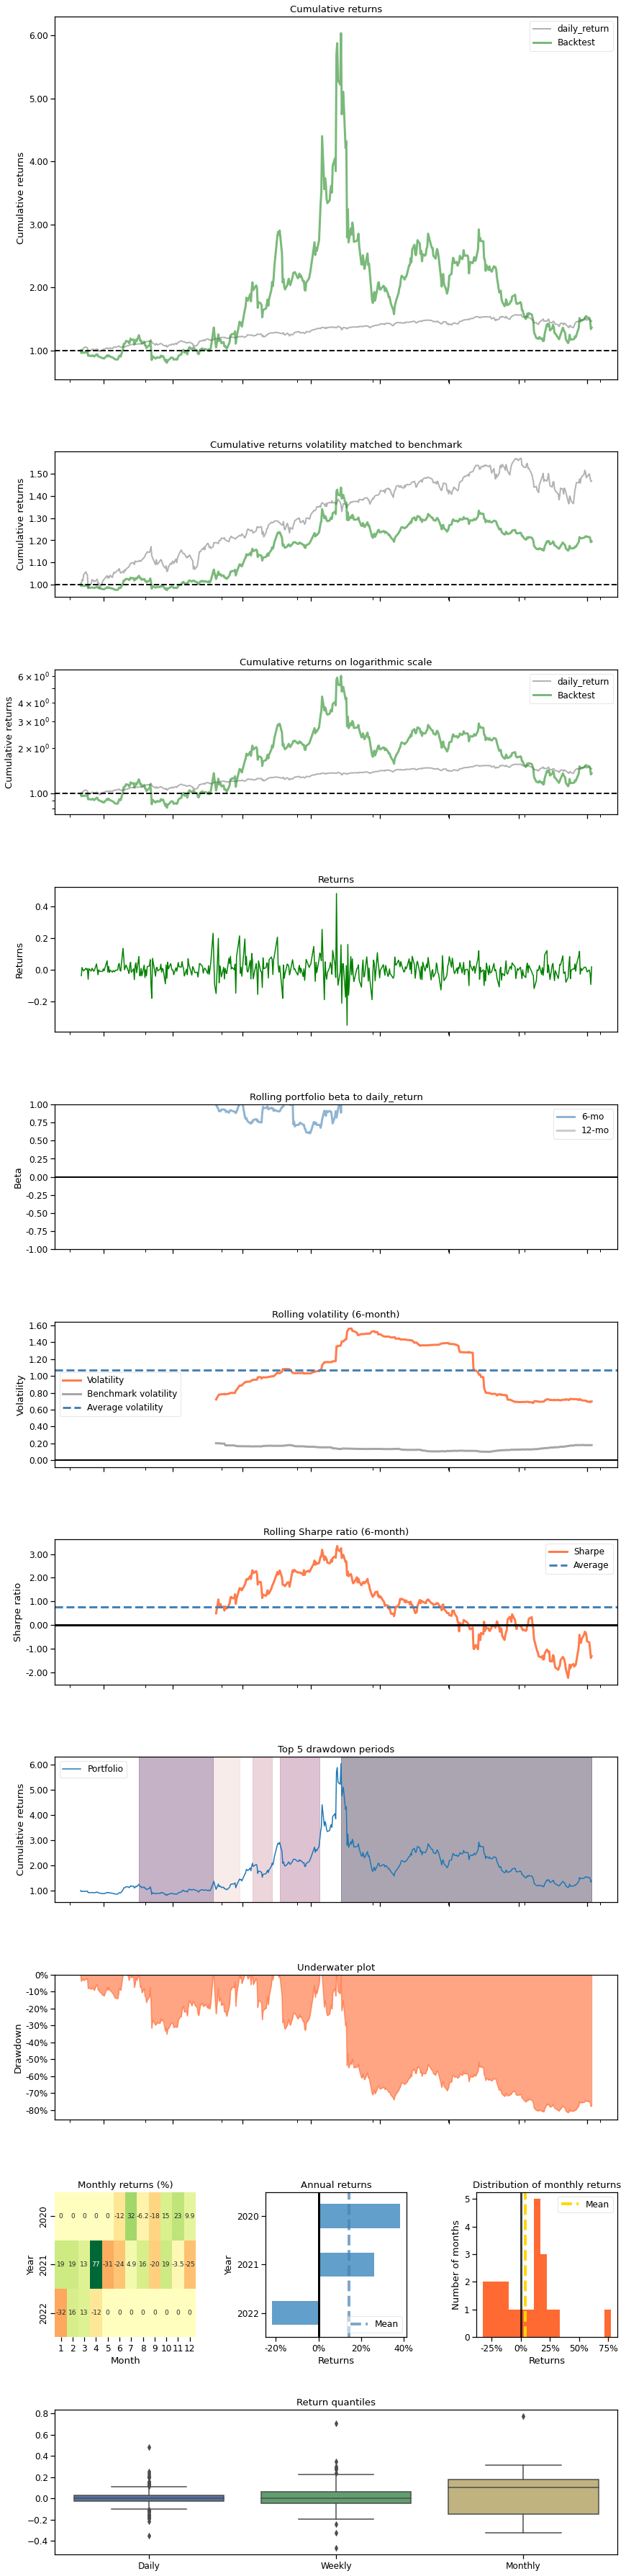

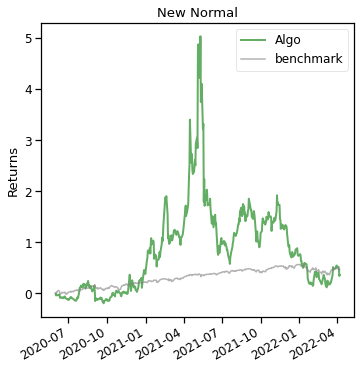

In [197]:
print("==============Compare to DJIA===========")

%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value,
              baseline_ticker = '^GSPC',
              baseline_start = df_account_value.loc[0,'date'],
              baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])

In [198]:
trade

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2020-06-01,ADA-USD,0.074244,0.082385,0.073659,0.081168,6.817807e+08,0.0,0.006800,0.076681,0.039623,72.293434,290.136257,66.784834,0.055404,0.046894,28.230000,65.824062
0,2020-06-01,BCH-USD,239.847229,256.042175,239.109161,255.352188,3.467572e+09,0.0,0.729876,253.891699,222.683137,52.410839,81.769518,18.068951,241.176086,240.570595,28.230000,65.824062
0,2020-06-01,BNB-USD,17.069530,18.001842,17.012215,17.914942,3.434450e+08,0.0,0.311277,17.762673,15.500985,55.829790,144.070654,19.701016,16.592179,16.051742,28.230000,65.824062
0,2020-06-01,BTC-USD,9463.605469,10199.565430,9450.899414,10167.268555,3.519890e+10,0.0,251.501799,10088.223137,8695.663777,60.451570,134.055150,33.859705,9315.720312,8344.314860,28.230000,65.824062
0,2020-06-01,DOGE-USD,0.002555,0.002662,0.002553,0.002647,1.957483e+08,0.0,0.000048,0.002619,0.002448,58.587955,168.627512,27.246233,0.002530,0.002314,28.230000,65.824062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,2022-04-07,ETH-USD,3172.197266,3263.474609,3155.581055,3233.274658,1.674550e+10,3.0,136.231786,3647.270152,2804.654799,53.497553,42.353365,2.795566,3041.781405,2933.687069,21.549999,4.933171
468,2022-04-07,LINK-USD,15.429636,15.844580,15.242517,15.775300,4.450630e+08,3.0,0.450926,18.267732,14.340900,48.659584,9.486584,0.642809,15.452173,15.345814,21.549999,4.933171
468,2022-04-07,LTC-USD,112.471046,114.877831,111.465805,114.230194,6.358738e+08,3.0,1.490782,134.358698,112.050947,47.063211,-32.255002,13.034492,117.768471,116.634218,21.549999,4.933171
468,2022-04-07,TRX-USD,0.063291,0.064770,0.063011,0.064430,9.719102e+08,3.0,0.001510,0.076639,0.058654,48.257113,-18.293232,2.951887,0.065239,0.063951,21.549999,4.933171


In [199]:
df_actions

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,TRX-USD,XRP-USD
date,,,,,,,,,,,
2020-06-01,100,100,0,59,100,0,0,100,61,100,39
2020-06-02,100,100,0,36,100,0,0,100,0,100,0
2020-06-03,100,100,0,-95,100,0,0,18,47,4,100
2020-06-04,100,100,0,59,100,0,0,100,61,100,39
2020-06-05,100,100,0,26,100,0,0,100,0,100,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,0,0,0,0,0,0,0,0,0,0,0
2022-04-01,0,0,0,0,0,0,0,0,0,0,0
2022-04-04,0,0,0,0,0,0,0,0,0,0,0


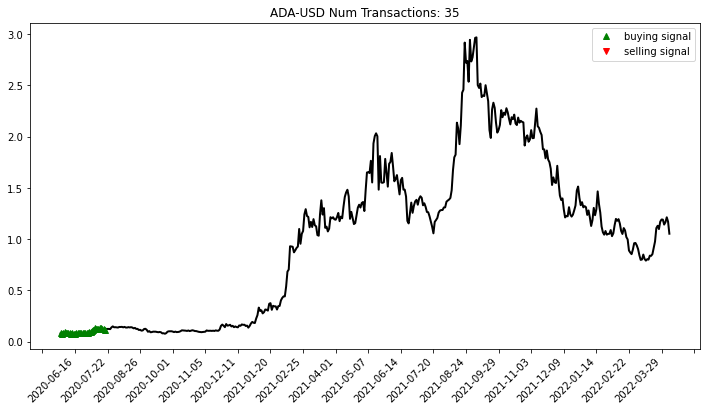

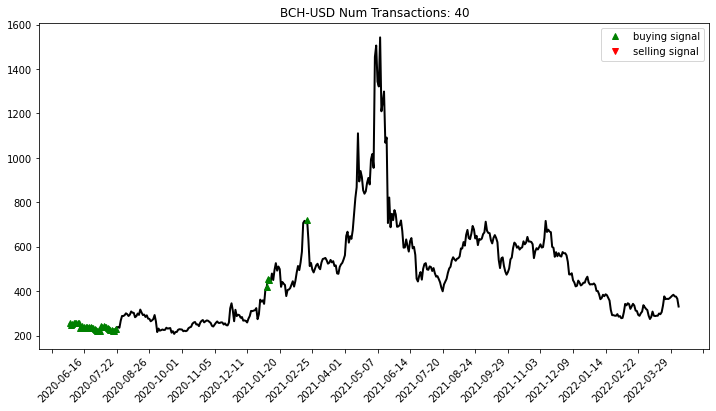

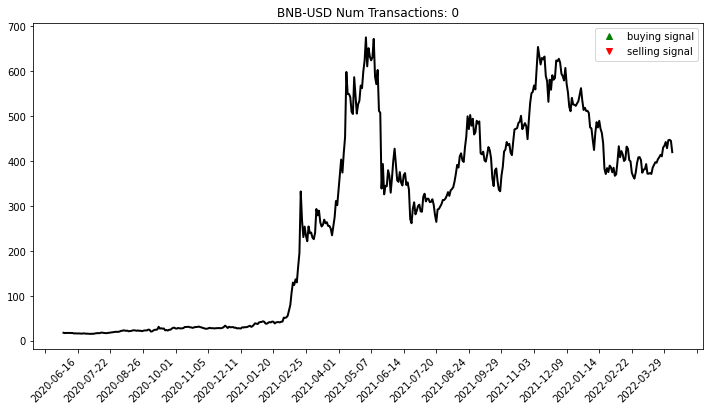

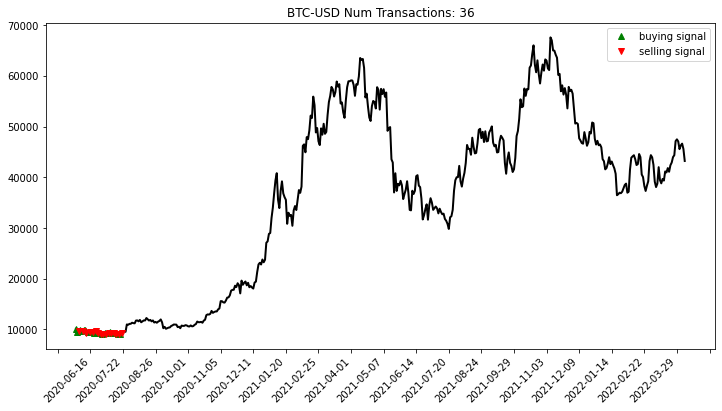

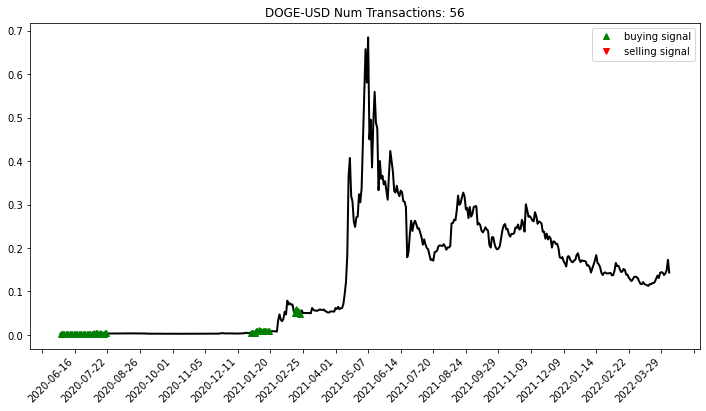

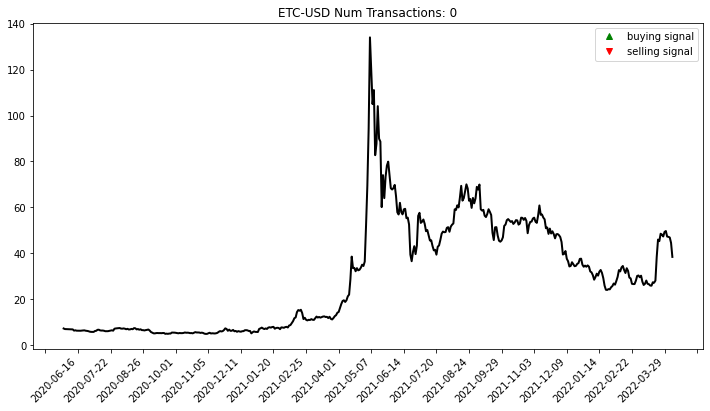

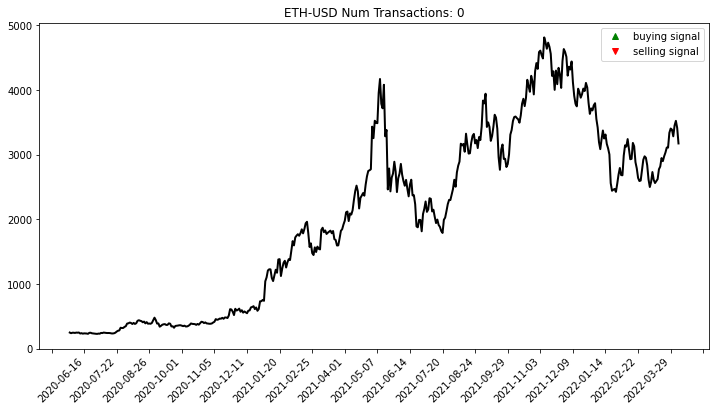

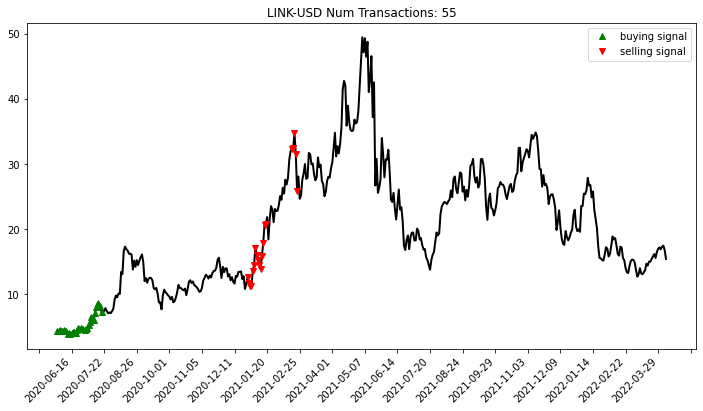

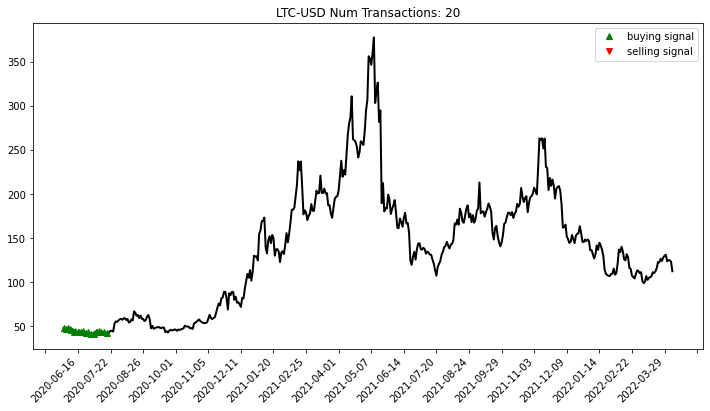

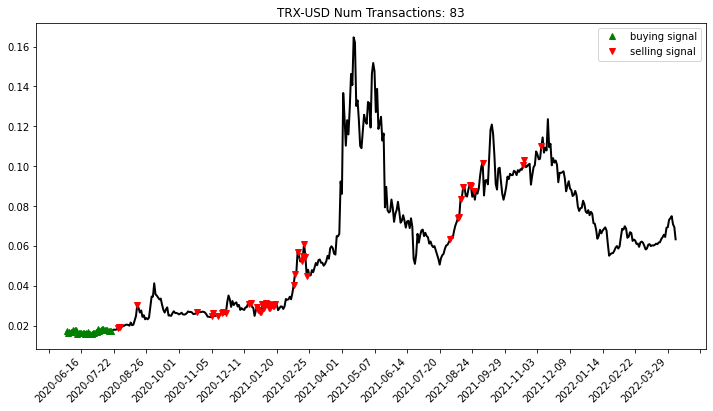

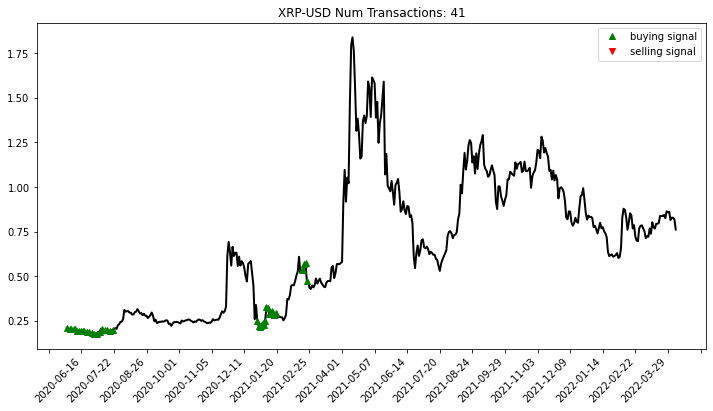

In [200]:
import matplotlib.dates as mdates
df_trx = df_actions
df_trade = trade

for i in range(df_trx.shape[1]):
    df_trx_temp = df_trx.iloc[:, i]
    df_trx_temp_sign = np.sign(df_trx_temp)
    buying_signal = df_trx_temp_sign.apply(lambda x: x > 0)
    selling_signal = df_trx_temp_sign.apply(lambda x: x < 0)

    tic_plot = df_trade[
        (df_trade["tic"] == df_trx_temp.name)
        & (df_trade["date"].isin(df_trx.index))
        ]["close"]
    tic_plot.index = df_trx_temp.index

    plt.figure(figsize=(12, 6))
    plt.plot(tic_plot, color="black", lw=2.0)
    plt.plot(
        tic_plot,
        "^",
        markersize=6,
        color="g",
        label="buying signal",
        markevery=buying_signal,
    )
    plt.plot(
        tic_plot,
        "v",
        markersize=6,
        color="r",
        label="selling signal",
        markevery=selling_signal,
    )
    plt.title(
        f"{df_trx_temp.name} Num Transactions: {len(buying_signal[buying_signal == True]) + len(selling_signal[selling_signal == True])}"
    )
    plt.legend()
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=25))
    plt.xticks(rotation=45, ha="right")
    plt.show()

In [ ]:

agent = DRLAgent(env=env_train)
model_ddpg = agent.get_model("ddpg")
trained_ddpg = agent.train_model(model=model_ddpg,
                                tb_log_name='ddpg',
                                total_timesteps=500000)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 274       |
|    time_elapsed    | 8         |
|    total_timesteps | 2424      |
| train/             |           |
|    actor_loss      | -358      |
|    critic_loss     | 3.49e+04  |
|    learning_rate   | 0.001     |
|    n_updates       | 1818      |
|    reward          | 2.3297107 |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 244       |
|    time_elapsed    | 19        |
|    total_timesteps | 4848      |
| train/             |           |
|    actor_loss      | -264      |
|    critic_loss     | 3.86e+03  |
|    learning_rate   | 0.001     |
|    n_updates       | 4242      |
|    reward          | 2.3297107 |
----------------------------------
day: 60

In [ ]:
data_risk_indicator = processed_full[(processed_full.date < '2021-01-01') & (processed_full.date >= '2017-01-01')]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])
insample_risk_indicator.vix.describe()
insample_risk_indicator.vix.quantile(0.996)
#trade = data_split(processed_full, '2020-07-01','2021-10-31')
e_trade_gym = StockTradingEnv(df=trade, turbulence_threshold=70, risk_indicator_col='vix', **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_ddpg,
    environment=e_trade_gym)
env_trade
df_actions

print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./" + config.RESULTS_DIR + "/perf_stats_all_" + now + '.csv')
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
    ticker="^DJI",
    start=df_account_value.loc[0, 'date'],
    end=df_account_value.loc[len(df_account_value) - 1, 'date'])

stats = backtest_stats(baseline_df, value_col_name='close')
% % javascript
IPython.OutputArea.auto_scroll_threshold = 9999;
print("==============Compare to DJIA===========")

% matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value,
              baseline_ticker='^GSPC',
              baseline_start=df_account_value.loc[0, 'date'],
              baseline_end=df_account_value.loc[len(df_account_value) - 1, 'date'])
trade
df_actions
import matplotlib.dates as mdates

df_trx = df_actions
df_trade = trade

for i in range(df_trx.shape[1]):
    df_trx_temp = df_trx.iloc[:, i]
    df_trx_temp_sign = np.sign(df_trx_temp)
    buying_signal = df_trx_temp_sign.apply(lambda x: x > 0)
    selling_signal = df_trx_temp_sign.apply(lambda x: x < 0)

    tic_plot = df_trade[
        (df_trade["tic"] == df_trx_temp.name)
        & (df_trade["date"].isin(df_trx.index))
        ]["close"]
    tic_plot.index = df_trx_temp.index

    plt.figure(figsize=(12, 6))
    plt.plot(tic_plot, color="black", lw=2.0)
    plt.plot(
        tic_plot,
        "^",
        markersize=6,
        color="g",
        label="buying signal",
        markevery=buying_signal,
    )
    plt.plot(
        tic_plot,
        "v",
        markersize=6,
        color="r",
        label="selling signal",
        markevery=selling_signal,
    )
    plt.title(
        f"{df_trx_temp.name} Num Transactions: {len(buying_signal[buying_signal == True]) + len(selling_signal[selling_signal == True])}"
    )
    plt.legend()
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=25))
    plt.xticks(rotation=45, ha="right")
    plt.show()

In [ ]:
agent = DRLAgent(env=env_train)
model_ppo = agent.get_model("ppo")
trained_ppo = agent.train_model(model=model_ppo,
                                 tb_log_name='ppo',
                                 total_timesteps=500000)

In [ ]:
data_risk_indicator = processed_full[(processed_full.date < '2021-01-01') & (processed_full.date >= '2017-01-01')]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])
insample_risk_indicator.vix.describe()
insample_risk_indicator.vix.quantile(0.996)
#trade = data_split(processed_full, '2020-07-01','2021-10-31')
e_trade_gym = StockTradingEnv(df=trade, turbulence_threshold=70, risk_indicator_col='vix', **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_ddpg,
    environment=e_trade_gym)
env_trade
df_actions

print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./" + config.RESULTS_DIR + "/perf_stats_all_" + now + '.csv')
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
    ticker="^DJI",
    start=df_account_value.loc[0, 'date'],
    end=df_account_value.loc[len(df_account_value) - 1, 'date'])

stats = backtest_stats(baseline_df, value_col_name='close')
% % javascript
IPython.OutputArea.auto_scroll_threshold = 9999;
print("==============Compare to DJIA===========")

% matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value,
              baseline_ticker='^GSPC',
              baseline_start=df_account_value.loc[0, 'date'],
              baseline_end=df_account_value.loc[len(df_account_value) - 1, 'date'])
trade
df_actions
import matplotlib.dates as mdates

df_trx = df_actions
df_trade = trade

for i in range(df_trx.shape[1]):
    df_trx_temp = df_trx.iloc[:, i]
    df_trx_temp_sign = np.sign(df_trx_temp)
    buying_signal = df_trx_temp_sign.apply(lambda x: x > 0)
    selling_signal = df_trx_temp_sign.apply(lambda x: x < 0)

    tic_plot = df_trade[
        (df_trade["tic"] == df_trx_temp.name)
        & (df_trade["date"].isin(df_trx.index))
        ]["close"]
    tic_plot.index = df_trx_temp.index

    plt.figure(figsize=(12, 6))
    plt.plot(tic_plot, color="black", lw=2.0)
    plt.plot(
        tic_plot,
        "^",
        markersize=6,
        color="g",
        label="buying signal",
        markevery=buying_signal,
    )
    plt.plot(
        tic_plot,
        "v",
        markersize=6,
        color="r",
        label="selling signal",
        markevery=selling_signal,
    )
    plt.title(
        f"{df_trx_temp.name} Num Transactions: {len(buying_signal[buying_signal == True]) + len(selling_signal[selling_signal == True])}"
    )
    plt.legend()
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=25))
    plt.xticks(rotation=45, ha="right")
    plt.show()